In [1]:
import torch
import datasets
import matplotlib.pyplot as plt
import random
import torchvision.transforms as transforms

/root/miniconda3/envs/gda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mnist_dataset = datasets.load_dataset("ylecun/mnist")


In [3]:
import pandas as pd
df_train = pd.DataFrame(mnist_dataset["train"])
df_train.head()

,image,label
0,<PIL.PngImagePlugin.PngImageFile image mode=L ...,5
1,<PIL.PngImagePlugin.PngImageFile image mode=L ...,0
2,<PIL.PngImagePlugin.PngImageFile image mode=L ...,4
3,<PIL.PngImagePlugin.PngImageFile image mode=L ...,1
4,<PIL.PngImagePlugin.PngImageFile image mode=L ...,9


In [7]:
want_label = 5
df_train_filtered = df_train[df_train["label"]==want_label]
df_train_filtered.head()

,image,label
0,<PIL.PngImagePlugin.PngImageFile image mode=L ...,5
11,<PIL.PngImagePlugin.PngImageFile image mode=L ...,5
35,<PIL.PngImagePlugin.PngImageFile image mode=L ...,5
47,<PIL.PngImagePlugin.PngImageFile image mode=L ...,5
65,<PIL.PngImagePlugin.PngImageFile image mode=L ...,5


In [14]:
idx = random.randint(0, len(mnist_dataset["train"]) - 1)
img = mnist_dataset["train"][idx]["image"]
label = mnist_dataset["train"][idx]["label"]

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

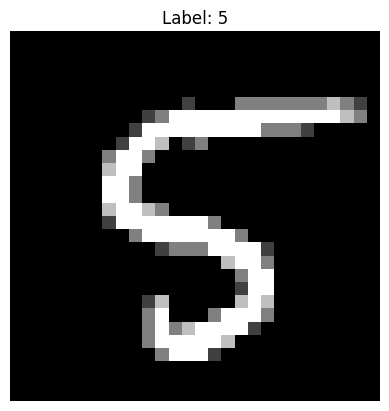

In [15]:
# plot the image
plt.imshow(img, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')

In [20]:
var_1 = 1
var_L = 0.01
L = 10
r = (var_L / var_1)**(1/(L - 1))
sigmas = [var_1 * (r**i) for i in range(10)]
print(sigmas)

[1.0, 0.599484250318941, 0.35938136638046275, 0.2154434690031884, 0.12915496650148842, 0.07742636826811272, 0.0464158883361278, 0.027825594022071253, 0.016681005372000592, 0.010000000000000004]


In [31]:
transforms.functional.pil_to_tensor(img).shape

torch.Size([1, 28, 28])

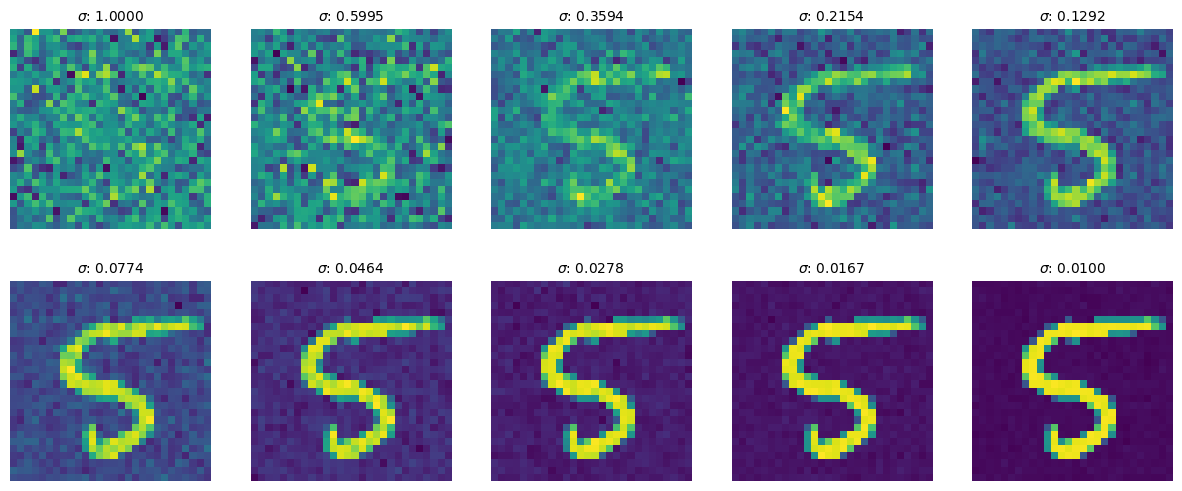

In [39]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i in range(len(sigmas)):
    ax = axes[i]
    img_tensor = transforms.functional.pil_to_tensor(img).float()/255.0
    noise = torch.randn_like(img_tensor) * sigmas[i]
    noised_img = img_tensor + noise
    ax.imshow(noised_img.squeeze())
    ax.set_title(f"$\\sigma$: {sigmas[i]:.4f}", fontsize=10) # Use LaTeX for sigma
    ax.axis('off')